<a href="https://colab.research.google.com/github/kelvinsima2/coupon_predictor/blob/main/Coursework1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Cleaning

In [ ]:
# Import necessary libraries, load then display dataset.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df= pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00603/in-vehicle-coupon-recommendation.csv')
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [ ]:
# Check column names
df.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

In [ ]:
# Check shape of dataframe
df.shape

(12684, 26)

In [ ]:
# Display which columns have missing values
df.isna().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

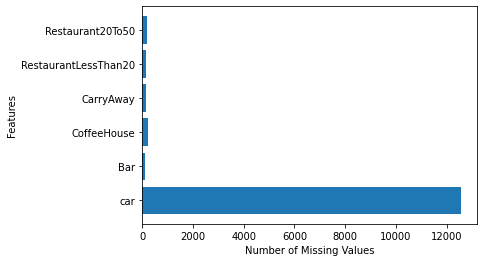

<Figure size 432x288 with 0 Axes>

In [ ]:
# Plot missing values
df_na = pd.DataFrame(df.isna().sum())
df_na = df_na.reset_index(level=0)
df_na.columns = ["column", "number_of_na"]
df_na = df_na[df_na['number_of_na'] > 0]
df_na
plt.barh(df_na['column'], df_na['number_of_na'])
plt.xlabel('Number of Missing Values')
plt.ylabel("Features")
plt.show()
plt.savefig("missing_na.png", bbox_inches='tight')



In [ ]:
# The column car has too many NaN values, and hence it is better to drop it as a feature.
df.drop('car', axis = 1, inplace = True)

In [ ]:
# We will then check the contents of the columns with NaN values.

columns = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']

for column in columns:
    print(set(df[column]))

{nan, '4~8', 'never', 'gt8', '1~3', 'less1'}
{nan, '4~8', 'never', 'gt8', '1~3', 'less1'}
{nan, '4~8', 'never', 'gt8', '1~3', 'less1'}
{nan, '4~8', 'never', 'gt8', '1~3', 'less1'}
{nan, '4~8', 'never', 'gt8', '1~3', 'less1'}


In [ ]:
# Remove rows that have NaN values
df.dropna(inplace = True)

In [ ]:
# Confirm dataframe has no missing values
df.isna().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

In [ ]:
# Check categorical valies of temperature and time and Y (target) columns.
columns = ['temperature', 'time', 'Y']

for column in columns:
    print(set(df[column]))

{80, 30, 55}
{'10PM', '7AM', '2PM', '10AM', '6PM'}
{0, 1}


In [ ]:
# Check summary statistics of numerical columns
df.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12079.000000,12079.000000,12079.0,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000
mean,63.334713,0.408478,1.0,0.561222,0.119381,0.215167,0.784833,0.569335
std,19.133246,0.491573,0.0,0.496258,0.324249,0.410955,0.410955,0.495190
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Remover unnecessary feature that has all values as 1.
df.drop('toCoupon_GEQ5min', axis = 1, inplace = True)

# Pre-Processing

In [ ]:
# Check datatype of each column.
print(df.dtypes)

destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object


In [ ]:
# Select features that are of text type and one hot encode them.
# Temperature is also one-hot encoded since its values are categorical.
# Code adapted from:
# [https://stackoverflow.com/questions/45836794/selecting-string-columns-in-pandas-df-equivalent-to-df-select-dtypes]
str_df = pd.DataFrame(df.applymap(lambda x: isinstance(x, str)).all(0))
str_columns = list(str_df[str_df[0] == True].index) + ['temperature']
str_columns
df_dummies = pd.get_dummies(df, columns = str_columns)

In [ ]:
# Separate features from the target variable and check shape
coupon_features = np.asarray(df_dummies.loc[:, df_dummies.columns != 'Y'])
coupon_target = np.asarray(df_dummies.loc[:, df_dummies.columns == 'Y'])
coupon_features.shape

(12079, 110)

In [ ]:
# Use principal component analysis to reduce data into fewer dimensions. 
# Number of features are reduces to 80.
from sklearn.decomposition import PCA
pca = PCA(n_components=80)
principalComponents = pca.fit_transform(coupon_features)
principalComponents.shape

(12079, 80)

# Training Data

In [ ]:
X = principalComponents
y = np.ravel(coupon_target)

# Split data into a training set and testing set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# K Nearest Neighbour

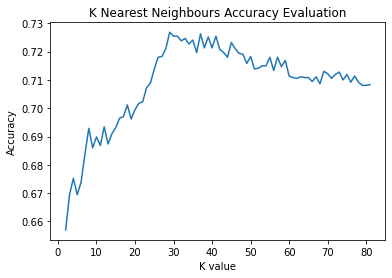

Optimum value: k =  29
The classification report for the training set is: 
               precision    recall  f1-score   support

           0       0.72      0.58      0.64      1543
           1       0.73      0.83      0.78      2081

    accuracy                           0.73      3624
   macro avg       0.73      0.71      0.71      3624
weighted avg       0.73      0.73      0.72      3624

The confusion matrix for the training set is:

[[ 898  645]
 [ 345 1736]]


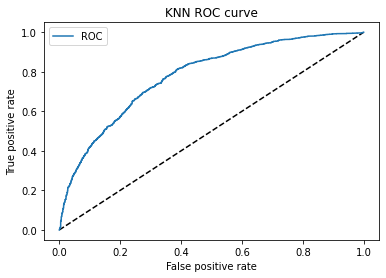

AUC score =  0.7796093906445472


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Create arrays with zeros to store accuracy data.
accuracy_array = np.zeros(80)
k_array = np.zeros(80)

# Loop through models with increasing values of n_neighbours
for k in np.arange(80):
    clf_kNN = KNeighborsClassifier(n_neighbors=k+2, weights='distance')
    clf_kNN.fit(X_train, y_train)
    y_pred=clf_kNN.predict(X_test)

    # Store accuracy in an array
    accuracy_array[k] = accuracy_score(y_test, y_pred)
    k_array[k] = k+2

# Plot accuracy against n_neighbours value.  
plt.plot(k_array, accuracy_array)
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.title('K Nearest Neighbours Accuracy Evaluation')
plt.savefig('KNN_Accuracy.png')
plt.show()

print("Optimum value: k = ", list(accuracy_array).index(max(accuracy_array))+2)
    
# Use the n_neighbours value with the highest accuracy to make the final model.
clf_kNN = KNeighborsClassifier(n_neighbors=list(accuracy_array).index(max(accuracy_array))+2, weights='distance')
clf_kNN.fit(X_train, y_train)
y_pred=clf_kNN.predict(X_test)
y_conf=clf_kNN.predict_proba(X_test)

# Get classification report of the model.
report_test = classification_report(y_test,y_pred)
print(f'The classification report for the training set is: \n {report_test}')
print('The confusion matrix for the training set is:\n')
print(confusion_matrix(y_test, y_pred))


from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
 
# Plot ROC curve 
fpr, tpr, thresholds = roc_curve(y_test, y_conf[:,1], pos_label=1)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('KNN ROC curve')
plt.legend(loc='best')
plt.savefig('KNN_roc.png')
plt.show()


auc_score = roc_auc_score(y_test, y_conf[:,1])
print("AUC score = ", auc_score)




In [ ]:
from sklearn.model_selection import cross_val_score
# Get cross validation score
scores = cross_val_score(clf_kNN, X, y, cv=5)
print("Average cross validation score = ", np.mean(scores))

Average cross validation score =  0.6369756831612576


# SVM

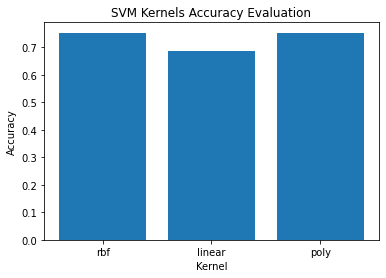

Best model =  rbf
The classification report for the training set is: 
               precision    recall  f1-score   support

           0       0.73      0.66      0.70      1543
           1       0.77      0.82      0.79      2081

    accuracy                           0.75      3624
   macro avg       0.75      0.74      0.74      3624
weighted avg       0.75      0.75      0.75      3624

The confusion matrix for the training set is:

[[1021  522]
 [ 374 1707]]


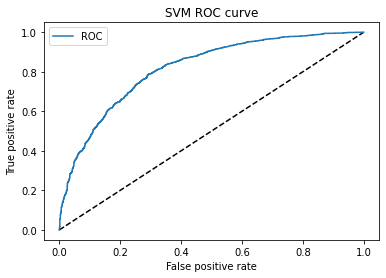

AUC score =  0.816471778268524


In [ ]:
from sklearn.svm import SVC
from sklearn import svm

kernels = ['rbf', 'linear', 'poly']

# Create array with zeros to store accuracy data.
accuracy_array = np.zeros(3)

# Loop through models with different types of kernels
for i, kernel in enumerate(kernels):
    model = svm.SVC(kernel=kernel)
    clf = model.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    accuracy_array[i] = accuracy_score(y_test, y_pred)

# Plot bar graph of accuracy of different kernels
plt.bar(kernels, accuracy_array)
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.title('SVM Kernels Accuracy Evaluation')
plt.savefig('svm_accuracy.png')
plt.show()

# Take the best kernel and use it to make the final SVM model 
print("Best model = ", kernels[list(accuracy_array).index(max(accuracy_array))])
model = svm.SVC(kernel=kernels[list(accuracy_array).index(max(accuracy_array))], probability = True)
clf = model.fit(X_train, y_train)
y_pred=clf.predict(X_test)
y_conf=clf.predict_proba(X_test)

# Get classification report.
report_test = classification_report(y_test,y_pred)
print(f'The classification report for the training set is: \n {report_test}')
print('The confusion matrix for the training set is:\n')
print(confusion_matrix(y_test, y_pred))

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_conf[:,1], pos_label=1)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('SVM ROC curve')
plt.legend(loc='best')
plt.savefig('svm_roc.png')
plt.show()


auc_score = roc_auc_score(y_test, y_conf[:,1])
print("AUC score = ", auc_score)


In [ ]:
# Takes long to compute. Uncomment to calculate cross validation score.  Average cross validation score is 0.685
#scores = cross_val_score(clf, X, y, cv=5)
#print("Average cross validation score = ", np.mean(scores))

# Decision Tree

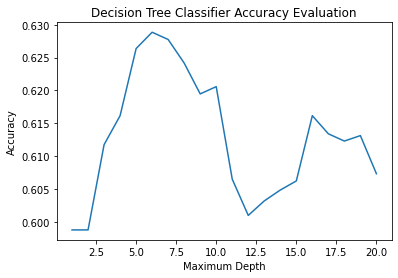

Optimum value: max depth =  6
The classification report for the training set is: 
               precision    recall  f1-score   support

           0       0.63      0.31      0.42      1543
           1       0.63      0.87      0.73      2081

    accuracy                           0.63      3624
   macro avg       0.63      0.59      0.57      3624
weighted avg       0.63      0.63      0.60      3624

The confusion matrix for the training set is:

[[ 478 1065]
 [ 280 1801]]


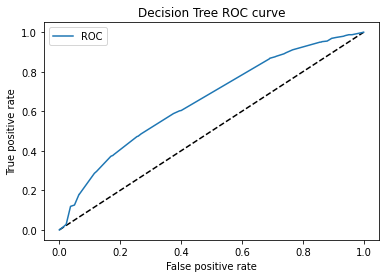

AUC score =  0.6540942446596573


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Create zero arrays to store accuracy and depth values.
accuracy_array = np.zeros(20)
depth_array = np.zeros(20)

# Loop through models with different values of max_depth
for depth in np.arange(20):
    model = DecisionTreeClassifier(criterion='entropy',random_state=0, max_depth=depth+1, min_samples_leaf=2)
    model.fit(X_train,y_train) 
    y_pred = model.predict(X_test)
    # Store accuracy and depth values in arrats
    depth_array[depth] = depth + 1
    accuracy_array[depth] = accuracy_score(y_test, y_pred)

# Plot accuracy against max_depth 
plt.plot(depth_array, accuracy_array)
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Classifier Accuracy Evaluation')
plt.savefig('dtree_accuracy.png')
plt.show()

# Obtain best depth.
good_depth = list(accuracy_array).index(max(accuracy_array))+1

print("Optimum value: max depth = ", good_depth)

# Create final decision tree model using best depth
model = DecisionTreeClassifier(criterion='entropy',random_state=0, max_depth=good_depth, min_samples_leaf=2)
model.fit(X_train,y_train) 
y_pred = model.predict(X_test)
y_conf=model.predict_proba(X_test)

# Get classification report and confusion matrix
report_test = classification_report(y_test,y_pred)
print(f'The classification report for the training set is: \n {report_test}')
print('The confusion matrix for the training set is:\n')
print(confusion_matrix(y_test, y_pred))

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_conf[:,1], pos_label=1)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Decision Tree ROC curve')
plt.legend(loc='best')
plt.savefig('dtree_roc.png')
plt.show()


auc_score = roc_auc_score(y_test, y_conf[:,1])
print("AUC score = ", auc_score)



In [ ]:
scores = cross_val_score(model, X, y, cv=5)
print("Average cross validation score = ", np.mean(scores))

Average cross validation score =  0.5896996901265545


# AdaBoost Classifier

The classification report for the training set is: 
               precision    recall  f1-score   support

           0       0.64      0.56      0.60      1543
           1       0.70      0.77      0.73      2081

    accuracy                           0.68      3624
   macro avg       0.67      0.66      0.67      3624
weighted avg       0.68      0.68      0.68      3624

The confusion matrix for the training set is:

[[ 869  674]
 [ 487 1594]]


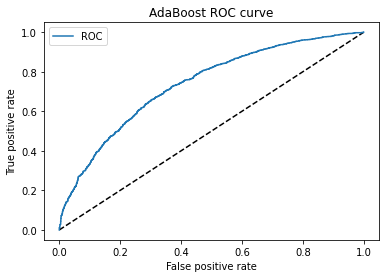

AUC score =  0.7372208136885184


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

# Create AdaBoost classifier model with logistic regression as base estimator
lr = LogisticRegression()
clf_A = AdaBoostClassifier(n_estimators=100, random_state=0, base_estimator = lr)
clf_A.fit(X_train, y_train)
y_pred = clf_A.predict(X_test)
y_conf=clf_A.predict_proba(X_test)

# Get classification report and confusion matrix
report_test = classification_report(y_test,y_pred)
print(f'The classification report for the training set is: \n {report_test}')
print('The confusion matrix for the training set is:\n')
print(confusion_matrix(y_test, y_pred))

# Plot ROC curve 
fpr, tpr, thresholds = roc_curve(y_test, y_conf[:,1], pos_label=1)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('AdaBoost ROC curve')
plt.legend(loc='best')
plt.savefig('ada_roc.png')
plt.show()

auc_score = roc_auc_score(y_test, y_conf[:,1])
print("AUC score = ", auc_score)

In [ ]:
# Get cross validation score
scores = cross_val_score(clf_A, X, y, cv=5)
print("Average cross validation score = ", np.mean(scores))

Average cross validation score =  0.6705866000301647
